# 🚦 **Road Network Analysis and Pathfinding Project**

## 📋 **Project Overview**
This project aims to analyze the road network of San Francisco, California, using OSMnx and NetworkX libraries. It involves downloading the road network, finding the shortest paths between specified points, extracting edge attributes, and visualizing the results.

## 🛠️ **Technologies Used**
- **OSMnx**: For downloading and analyzing street networks.
- **NetworkX**: For graph manipulation and analysis.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib**: For plotting and visualization.

## 🌍 **Step-by-Step Process**

### 1. **Download and Plot the Road Network**
- The road network of San Francisco is downloaded using OSMnx, and a visual representation is created.

### 2. **Define Start and End Points**
- The starting and ending geographical coordinates are defined for pathfinding.

### 3. **Find Shortest Path Using Dijkstra's Algorithm**
- The nearest nodes corresponding to the defined coordinates are found, and the shortest path between these nodes is calculated using Dijkstra's algorithm.

### 4. **Extract Edge Attributes**
- The edge attributes of the road network are extracted and analyzed. Key attributes such as road name, maximum speed, and one-way status are displayed.
- The shortest and longest roads based on length are identified and presented.

### 5. **Calculate Network Density**
- The density of the road network is computed as edges per square meter, providing insights into the connectivity of the area.

### 6. **Load the Road Network from GraphML File**
- The previously saved road network is loaded from a GraphML file for further analysis, allowing the exploration of its structure.

### 7. **Dijkstra's and A* Search Algorithms**
- Two different pathfinding algorithms, Dijkstra's and A*, are utilized to determine routes between the defined start and end locations. The paths and their lengths are compared.

### 8. **Visualize the Paths on the Map**
- A comprehensive visualization is created, highlighting the paths determined by both algorithms on the road network map, providing a clear comparison of the two routes.

## 🔍 **Conclusion**
This project demonstrates the capability of using OSMnx and NetworkX for road network analysis, allowing for efficient pathfinding in urban environments. The techniques applied can be beneficial for various applications, including emergency response planning and urban mobility studies.

In [44]:
# Install OSMnx package (if not installed already)

In [45]:
!pip install osmnx networkx pandas matplotlib  # Install necessary packages for network analysis and visualization


In [157]:
import warnings# Import warnings to suppress warnings

In [158]:
warnings.filterwarnings("ignore")  # Ignore warning messages

# 📚 Step 1: Importing Libraries

In this step, we import the necessary libraries that will facilitate the analysis and visualization of the street network. The libraries included are:

- **OSMnx**: Used for downloading and analyzing OpenStreetMap (OSM) street networks.
- **NetworkX**: A library for creating, manipulating, and studying complex networks.
- **Matplotlib**: A plotting library for visualizing data in a variety of formats.
- **Pandas**: A data manipulation and analysis library that offers data structures like DataFrames.

These libraries are essential for accessing the road network data, performing network analysis, and visualizing the results.

In [46]:
# Import required libraries

In [47]:
import osmnx as ox  # Import OSMnx for downloading and analyzing street networks

In [48]:
import networkx as nx  # Import NetworkX for graph manipulation and analysis

In [49]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting graphs

In [50]:
import pandas as pd  # Import Pandas for data manipulation and analysis

# 📍 Step 2: Defining the Area to Analyze

Here, we specify the geographic area for our analysis. The location is set to "San Francisco, California, USA." This area will serve as the basis for our road network analysis, allowing us to focus our study on the street network within this city.

In [51]:
# Define the area to analyze

In [52]:
place_name = "San Francisco, California, USA"  # Specify the location for analysis

# 🌐 Step 3: Downloading and Plotting the Road Network

In this step, we download the road network for San Francisco using OSMnx. The road network is represented as a graph where intersections are nodes and roads are edges. After downloading, we visualize the road network to gain insights into its structure.

Additionally, we save the road network as a GraphML file for future use, enabling us to reload the network without needing to download it again.

In [149]:
# Download and plot the road network

In [54]:
G = ox.graph_from_place(place_name, network_type='drive')  # Download the road network as a graph

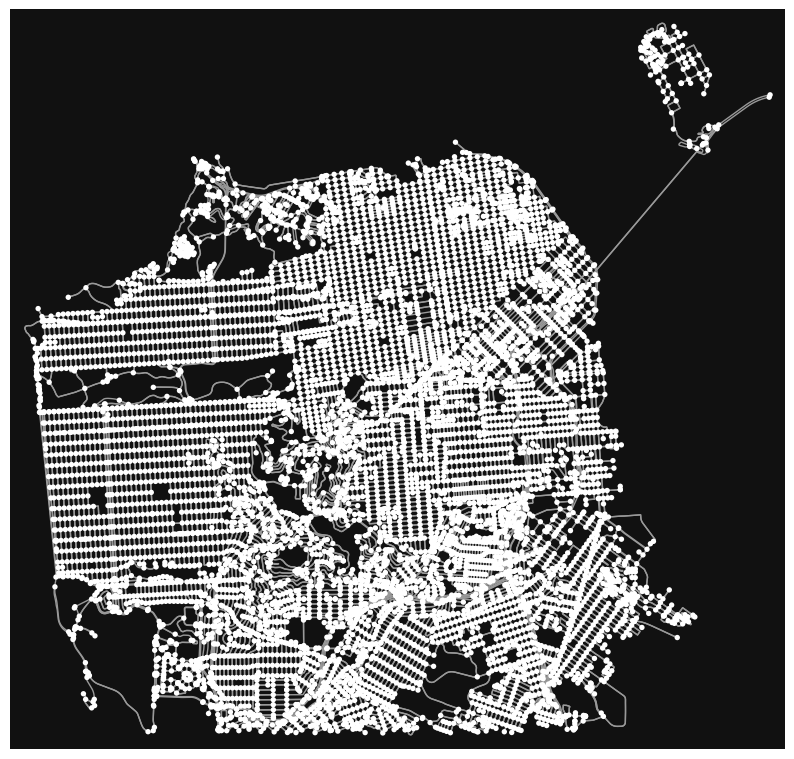

<Figure size 640x480 with 0 Axes>

In [129]:
fig, ax = ox.plot_graph(G, figsize=(10, 10))  # Plot the graph of the road network
plt.savefig("san_francisco_road_network.pdf")  # Save the road network plot as PDF

In [56]:
# Save the road network as GraphML file

In [57]:
ox.save_graphml(G, filepath="san_francisco_road_network.graphml")  # Save the downloaded graph for future use


# 🚦 Step 4: Defining Start and End Points

We set the start and end locations for our path analysis using latitude and longitude coordinates. The start point is set at (37.7749, -122.4194) and the end point at (37.7849, -122.4094). These coordinates will help in finding the nearest nodes in the road network to compute the shortest path between them.

In [150]:
# Define start and end points (latitude, longitude)

In [59]:
start_latlng = (37.7749, -122.4194)  # Set the starting location (latitude, longitude)

In [60]:
end_latlng = (37.7849, -122.4094)  # Set the ending location (latitude, longitude)

In [61]:
# Find the nearest nodes to the start and end points

In [62]:
start_node = ox.distance.nearest_nodes(G, start_latlng[1], start_latlng[0])  # Get the nearest node for the start location


In [63]:
end_node = ox.distance.nearest_nodes(G, end_latlng[1], end_latlng[0])  # Get the nearest node for the end location


# 🛣️ Step 5: Finding the Shortest Path Using Dijkstra's Algorithm

This step involves calculating the shortest path between the start and end nodes using Dijkstra's algorithm. This algorithm finds the least-cost path in a graph, based on a specified weight—in this case, the length of the roads. We visualize the shortest path on the graph to understand the route.

In [151]:
# Find the shortest path using Dijkstra's Algorithm

In [65]:
shortest_path = nx.shortest_path(G, start_node, end_node, weight='length')  # Calculate the shortest path between the nodes using Dijkstra's algorithm


In [66]:
# Plot the shortest path

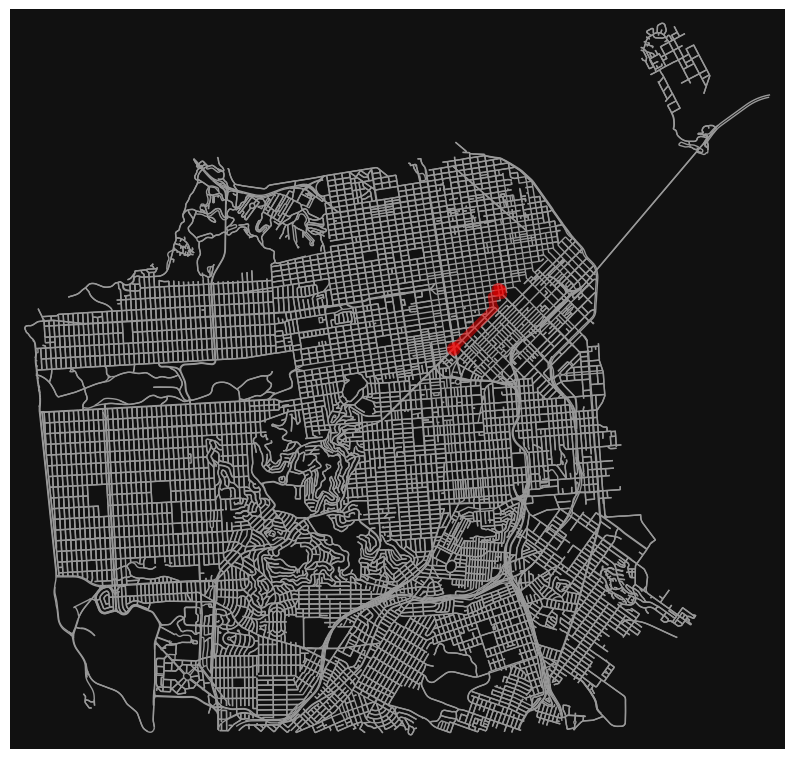

<Figure size 640x480 with 0 Axes>

In [130]:
fig, ax = ox.plot_graph_route(G, shortest_path, route_linewidth=6, node_size=0, figsize=(10, 10))  # Plot the shortest path on the graph
plt.savefig("shortest_path_dijkstra.pdf")  # Save the Dijkstra's shortest path plot as PDF

# 📊 Step 6: Extracting Edge Attributes

We convert the graph edges into a GeoDataFrame to extract various edge attributes, such as the road name, maximum speed, and one-way status. This information is crucial for analyzing road characteristics. Additionally, we identify the shortest and longest roads in the network based on the length attribute and display this information.

In [152]:
# Extract edge attributes

In [69]:
edges = ox.graph_to_gdfs(G, nodes=False)  # Convert the graph edges to a GeoDataFrame

In [70]:
print("Edge Attributes Sample:")  # Print a header for edge attributes
print(edges[['name', 'maxspeed', 'oneway']].head())  # Display sample edge attributes such as name, maximum speed, and one-way status


Edge Attributes Sample:
                                                       name          maxspeed  \
u        v          key                                                         
32927563 4377020523 0    San Francisco – Oakland Bay Bridge  [50 mph, 40 mph]   
32927591 315706881  0                                   NaN               NaN   
         6469349533 0                  John F Foran Freeway            65 mph   
32927645 65331336   0          Southern Embarcadero Freeway            65 mph   
         766946830  0                                   NaN            50 mph   

                         oneway  
u        v          key          
32927563 4377020523 0      True  
32927591 315706881  0      True  
         6469349533 0      True  
32927645 65331336   0      True  
         766946830  0      True  


In [71]:
# Find the shortest and longest roads based on the length attribute

In [72]:
shortest_road = edges.loc[edges['length'].idxmin()]  # Identify the shortest road by finding the minimum length


In [73]:
longest_road = edges.loc[edges['length'].idxmax()]  # Identify the longest road by finding the maximum length


In [74]:
print("\nShortest Road:")  # Print a header for the shortest road
print(shortest_road[['name', 'length']])  # Display the name and length of the shortest road


Shortest Road:
name       NaN
length    0.56
Name: (3985226613, 7210516367, 0), dtype: object


In [75]:
print("\nLongest Road:")  # Print a header for the longest road
print(longest_road[['name', 'length']])  # Display the name and length of the longest road


Longest Road:
name      San Francisco – Oakland Bay Bridge
length                              3601.478
Name: (2443845209, 65286228, 0), dtype: object


# 📈 Step 7: Calculating the Density of the Network

In this step, we calculate the density of the road network by determining the ratio of the number of edges to the area of the geographic location. This metric gives insight into how interconnected the street network is within the given area. A higher density typically indicates a more connected network, which can affect navigation and travel efficiency.

In [153]:
#  Calculate the density of the network

In [77]:
area = ox.geocode_to_gdf(place_name).unary_union.area  # Calculate the area of the location in square meters


In [78]:
density = G.number_of_edges() / area  # Compute network density as edges per square meter

In [79]:
print(f"\nNetwork density: {density:.6f} edges per square meter")  # Print the network density


Network density: 446155.806919 edges per square meter


# 🔄 Step 8: Loading the Road Network from GraphML File

Here, we load the previously saved GraphML file of the road network. This step is essential for reusing the road network data without redownloading it, saving time and computational resources. We print basic details about the graph, including the number of nodes and edges, to understand the size and complexity of the network.

In [154]:
#  Load the road network from GraphML file

In [81]:
file_path = "san_francisco_road_network.graphml"  # Specify the path to the GraphML file

In [82]:
G = ox.load_graphml(file_path)  # Load the road network graph from the file

# 🧐 Step 9: Inspecting Graph Data Types

This step involves inspecting the data types associated with the nodes and edges in the graph. Understanding the data types helps in knowing what attributes are available for analysis. We convert the node data into a DataFrame for easier inspection, enabling us to explore the attributes associated with each node.

In [83]:
# Print basic details about the graph

In [84]:
print(f"Number of nodes: {G.number_of_nodes()}")  # Print the total number of nodes in the graph
print(f"Number of edges: {G.number_of_edges()}")  # Print the total number of edges in the graph

Number of nodes: 9929
Number of edges: 27437


In [85]:
# Inspect graph data types for nodes

In [86]:
node_data = pd.Series(dict(G.nodes(data=True))).apply(pd.Series)  # Convert node data to a DataFrame for inspection


In [87]:
print("\nNode Types:")  # Print a header for node data types
print(node_data.dtypes)  # Print the data types of node attributes


Node Types:
y               float64
x               float64
street_count    float64
ref              object
highway          object
dtype: object


In [88]:
# Inspect graph data types for edges

In [89]:
print("\nEdge Types:")  # Print a header for edge data types
edge_data = G.edges(keys=True, data=True)  # Retrieve edge data with keys and attributes


Edge Types:


In [90]:
# Create a list of edge attributes

In [91]:
edge_attributes = []  # Initialize a list to store edge attributes

In [92]:
for u, v, key, data in edge_data:  # Iterate through each edge
    data_dict = {'u': u, 'v': v, 'key': key}  # Create a dictionary with edge nodes and key
    data_dict.update(data)  # Add edge attributes to the dictionary
    edge_attributes.append(data_dict)  # Append the dictionary to the list

In [93]:
# Convert to DataFrame for easier inspection

In [94]:
edge_types_df = pd.DataFrame(edge_attributes)  # Convert the list of edge attributes to a DataFrame

In [95]:
# Print edge data types and sample data

In [96]:
print("\nEdge Types DataFrame:")  # Print a header for edge types DataFrame
print(edge_types_df.dtypes)  # Print the data types of edge attributes


Edge Types DataFrame:
u             int64
v             int64
key           int64
osmid        object
oneway         bool
lanes        object
ref          object
name         object
highway      object
maxspeed     object
reversed     object
length      float64
bridge       object
tunnel       object
geometry     object
access       object
junction     object
width        object
dtype: object


In [97]:
print("\nSample Edge Data:")  # Print a header for sample edge data
print(edge_types_df.head())  # Display the first few rows of the edge attributes DataFrame


Sample Edge Data:
          u           v  key  \
0  32927563  4377020523    0   
1  32927591   315706881    0   
2  32927591  6469349533    0   
3  32927645    65331336    0   
4  32927645   766946830    0   

                                               osmid  oneway lanes    ref  \
0  [661905446, 50691047, 52721870, 52527662, 5069...    True     5   I 80   
1                                           28715659    True     1    NaN   
2                                          689603997    True     4  I 280   
3                      [28846637, 8918870, 61424023]    True     2  I 280   
4  [8915137, 33645923, 33645968, 28656664, 61424026]    True     2    NaN   

                                 name        highway          maxspeed  \
0  San Francisco – Oakland Bay Bridge       motorway  [50 mph, 40 mph]   
1                                 NaN  motorway_link               NaN   
2                John F Foran Freeway       motorway            65 mph   
3        Southern Embarcadero

# 🔍 Step 10: Checking Graph Simplification Status

Before proceeding with further analysis, we check if the graph has been simplified. Graph simplification reduces complexity by merging nodes and removing unnecessary edges, making the graph easier to work with. If the graph is not simplified, we apply the simplification process and confirm its completion.

In [98]:
# Check for graph simplification status and simplify if necessary

In [99]:
if "simplified" not in G.graph or not G.graph["simplified"]:  # Check if the graph is not already simplified
    G = ox.simplify_graph(G)  # Simplify the graph to reduce complexity
    print("\nGraph has been simplified.")  # Print a confirmation message
else:
    print("\nGraph was already simplified.")  # Print a message if the graph is already simplified


Graph was already simplified.


# 🛤️ Step 11: Dijkstra's and A* Search Algorithms

In this step, we perform pathfinding using both Dijkstra's and A* search algorithms. Both algorithms are designed to find the shortest path, but they use different approaches. Dijkstra's algorithm explores all possible paths equally, while A* uses heuristics to optimize the search. We compare the paths found by each algorithm and print their lengths for analysis.

In [155]:
# Dijkstra's and A* Search Algorithms

In [101]:
# Define start and end locations for the paths

In [102]:
start_node = ox.distance.nearest_nodes(G, X=-122.4194, Y=37.7749)  # Find the nearest node to the starting location


In [103]:
end_node = ox.distance.nearest_nodes(G, X=-122.4231, Y=37.8268)  # Find the nearest node to the ending location


In [104]:
# Dijkstra's Algorithm

In [105]:
dijkstra_path = nx.dijkstra_path(G, source=start_node, target=end_node)  # Calculate the path using Dijkstra's algorithm


In [106]:
dijkstra_length = nx.path_weight(G, dijkstra_path, weight='length')  # Compute the length of the Dijkstra's path


In [107]:
# Print Dijkstra's path and length

In [108]:
print("Dijkstra's Algorithm Path:")  # Print a header for Dijkstra's path
print(dijkstra_path)  # Display the Dijkstra's path

Dijkstra's Algorithm Path:
[1723739149, 9691587709, 1723739386, 5858516713, 4998861436, 4998861437, 5012209349, 1723739366, 6386250944, 1723738966, 1723738829, 65293741, 65318282, 65325032, 6925582021, 65351772, 65300097, 65342807, 65329980, 65317030, 65334510, 65363153, 65308413, 65329405, 65303488, 65309522, 258965613, 65363148, 293625602, 322653582, 65373362, 65373364, 65333957, 65345229, 65373502, 260194288, 9209919060, 65373321, 3719529498, 65333347, 2071244791, 276549406, 276549407, 434685829]


In [109]:
print("Dijkstra's Path Length (meters):", dijkstra_length)  # Print the length of the Dijkstra's path


Dijkstra's Path Length (meters): 6546.319999999999


In [110]:
# A* Search Algorithm

In [111]:
a_star_path = nx.astar_path(G, source=start_node, target=end_node)  # Calculate the path using A* algorithm


In [112]:
a_star_length = nx.path_weight(G, a_star_path, weight='length')  # Compute the length of the A* path


In [113]:
# Print A* path and length

In [114]:
print("\nA* Search Algorithm Path:")  # Print a header for A* path
print(a_star_path)  # Display the A* path


A* Search Algorithm Path:
[1723739149, 9691587709, 1723739386, 5858516713, 4998861436, 4998861437, 5012209349, 1723739366, 6386250944, 1723738966, 1723738829, 65293741, 65318282, 65325032, 6925582021, 65351772, 65300097, 65342807, 65329980, 65317030, 65334510, 65363153, 65308413, 65329405, 65303488, 65309522, 258965613, 65363148, 293625602, 322653582, 65373362, 65373364, 65333957, 65345229, 65373502, 260194288, 9209919060, 65373321, 3719529498, 65333347, 2071244791, 276549406, 276549407, 434685829]


In [131]:
print("A* Path Length (meters):", a_star_length)  # Print the length of the A* path

A* Path Length (meters): 6546.319999999999


# 🗺️ Step 12: Visualizing the Paths on the Map

Finally, we visualize both the Dijkstra's and A* paths on the road network. By highlighting these paths, we can visually compare the routes suggested by each algorithm. This step is crucial for understanding how different algorithms can lead to varying path selections and the implications for emergency response planning.

In [156]:
# Visualize the paths on the map

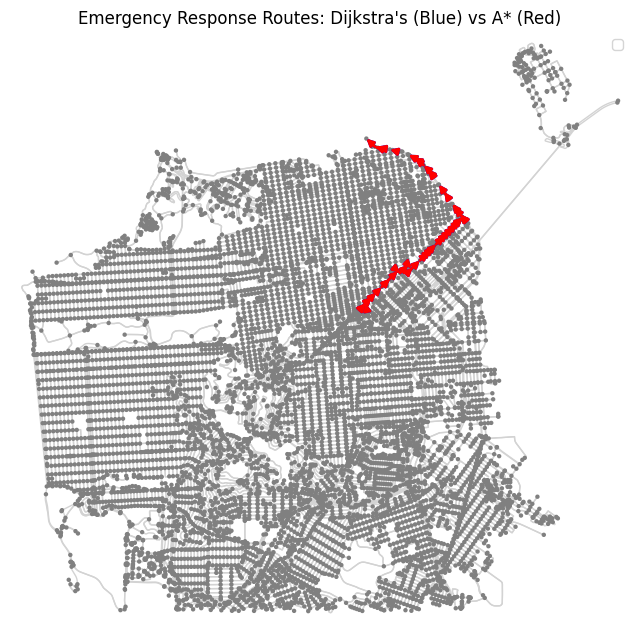

In [160]:
fig, ax = ox.plot_graph(G, node_color='gray', node_size=10, edge_color='lightgray', show=False)  # Plot the entire road network

# Create a dictionary of node positions
node_pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}  # Create a position dictionary for the nodes

# Highlight Dijkstra's path
dijkstra_edges = list(zip(dijkstra_path[:-1], dijkstra_path[1:]))  # Create a list of edges for Dijkstra's path
nx.draw_networkx_edges(G, pos=node_pos,
                         edgelist=dijkstra_edges, edge_color='blue', width=2, ax=ax, label="Dijkstra's Path")  # Draw Dijkstra's path in blue

# Highlight A* path
a_star_edges = list(zip(a_star_path[:-1], a_star_path[1:]))  # Create a list of edges for A* path
nx.draw_networkx_edges(G, pos=node_pos,
                         edgelist=a_star_edges, edge_color='red', width=2, ax=ax, label="A* Path")  # Draw A* path in red

# Add labels and legend
plt.title("Emergency Response Routes: Dijkstra's (Blue) vs A* (Red)")  # Set the title for the plot
plt.legend()  # Add a legend to the plot
plt.savefig("emergency_response_route.pdf", format='pdf', bbox_inches='tight')  # Save the figure as a PDF
plt.axis('off')  # Turn off the axis for better visualization
plt.show()  # Display the plot

# 🏁 Conclusion

In this project, we explored the street network of San Francisco using OSMnx and NetworkX, focusing on analyzing and visualizing the road network. Key steps included:

- Importing necessary libraries for data manipulation and visualization.
- Defining a specific geographic area for analysis.
- Downloading and plotting the road network, providing a visual context for further analysis.
- Identifying start and end points for pathfinding.
- Calculating the shortest paths using Dijkstra's and A* search algorithms, demonstrating the different approaches to pathfinding.
- Extracting edge attributes to understand the road characteristics.
- Calculating network density, which offers insights into the connectivity of the street network.
- Loading previously saved network data for efficiency and ease of analysis.
- Inspecting data types to ensure proper understanding of available attributes.
- Visualizing the paths obtained from different algorithms, facilitating a comparison of their effectiveness.

Overall, this project highlights the importance of spatial network analysis in urban planning and emergency response strategies. By leveraging advanced graph algorithms and visualization techniques, we can derive meaningful insights from complex street networks, aiding in the optimization of navigation routes and improving city infrastructure planning.